# The causal impact of capital punishment upon murders
## Is anybody scared of the death penalty?

### Isaac Updike & Ryan Granet



## To Do: 

- look into lagging effects ($exec_{t-1}$)?

- describe methodology

- examine results

- compile more data on executions

In [1]:
import ipystata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### ipystata set up: 
###  replace stata location with your own & 
###  uncomment below 2 lines to set up ipystata in batch mode
# from ipystata.config import config_stata  
# config_stata('C:\Program Files\Stata16\StataIC-64', force_batch=True)

IPyStata is loaded in batch mode.


Load in execution data from [Death Penalty Information Center Exectuion Database](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDMoiJXVldahXzL4S037MGb7DgZMfeqfrR-zYtDJ_U-Sd6FS35W7WU_6N8pXBOm9NOBGIM8BEui37x/pub?gid=0&single=true&output=csv) to attempt to expand dataset


In [2]:
exs = pd.read_csv('data/dpic_exec.csv',usecols = list(range(14))) #

#change dates to datetime format
exs[['Execution Date']] = pd.to_datetime(
    exs.iloc[:,1], infer_datetime_format=True)

exs.rename(columns={"Execution Date": "date"}, inplace =True)
exs['execs'] = np.ones(exs.shape[0])

exs.head(4)

,Execution#,date,First Name,Last Name,Middle Name(s),Suffix,Race,Sex,Region,State,County,Foreign National,Execution Method,Execution Volunteer,execs
0,1,1977-01-17,Gary,Gilmore,Mark,NaN,White,Male,West,Utah,Utah County,Not a Foreign National,Firing Squad,Volunteer,1.0
1,2,1979-05-25,John,Spenkelink,NaN,NaN,White,Male,South,Florida,Leon County,Not a Foreign National,Electrocution,Not a Volunteer,1.0
2,3,1979-10-22,Jesse,Bishop,NaN,NaN,White,Male,West,Nevada,Clark County,Not a Foreign National,Gas,Volunteer,1.0
3,4,1981-03-09,Steven,Judy,NaN,NaN,White,Male,Midwest,Indiana,Morgan County,Not a Foreign National,Electrocution,Volunteer,1.0


total executinos: 1527.0


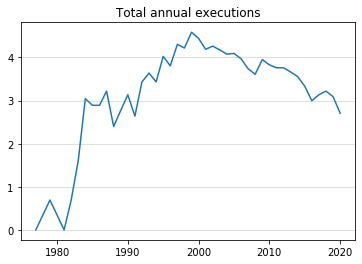

In [24]:
execbyyr = exs.groupby(exs.date.dt.year)['execs'].agg('sum')
print('total executinos:',sum(execbyyr))

plt.plot(log_exec)
plt.plot()
plt.title('Total annual executions')
plt.grid(axis='y', alpha=0.5)

log_exec = np.log(execbyyr)

In [4]:
exs

,Execution#,date,First Name,Last Name,Middle Name(s),Suffix,Race,Sex,Region,State,County,Foreign National,Execution Method,Execution Volunteer,execs
0,1,1977-01-17,Gary,Gilmore,Mark,NaN,White,Male,West,Utah,Utah County,Not a Foreign National,Firing Squad,Volunteer,1.0
1,2,1979-05-25,John,Spenkelink,NaN,NaN,White,Male,South,Florida,Leon County,Not a Foreign National,Electrocution,Not a Volunteer,1.0
2,3,1979-10-22,Jesse,Bishop,NaN,NaN,White,Male,West,Nevada,Clark County,Not a Foreign National,Gas,Volunteer,1.0
3,4,1981-03-09,Steven,Judy,NaN,NaN,White,Male,Midwest,Indiana,Morgan County,Not a Foreign National,Electrocution,Volunteer,1.0
4,5,1982-08-10,Frank,Coppola,NaN,NaN,White,Male,South,Virginia,Newport News city,Not a Foreign National,Electrocution,Volunteer,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,1523,2020-08-26,Lezmond,Mitchell,NaN,NaN,Native American,Male,Federal,Federal,Federal,Not a Foreign National,Lethal Injection,Not a Volunteer,1.0
1523,1524,2020-08-28,Keith,Nelson,Dwayne,NaN,White,Male,Federal,Federal,Federal,Not a Foreign National,Lethal Injection,Not a Volunteer,1.0
1524,1525,2020-09-22,William,LeCroy,Emmett,NaN,White,Male,Federal,Federal,Federal,Not a Foreign National,Lethal Injection,Not a Volunteer,1.0
1525,1526,2020-09-24,Christopher,Vialva,Andre,NaN,Black,Male,Federal,Federal,Federal,Not a Foreign National,Lethal Injection,Not a Volunteer,1.0


In [5]:
df[['execs']].sum()

NameError: name 'df' is not defined

In [6]:
df = pd.read_stata('data/countymurders.dta')
df.head(4)

,arrests,countyid,density,popul,perc1019,perc2029,percblack,percmale,rpcincmaint,rpcpersinc,rpcunemins,year,murders,murdrate,arrestrate,statefips,countyfips,execs,lpopul,execrate
0,2.0,1001,54.049999,32216.0,20.629999,15.28,22.330000,40.250000,167.669998,8780.799805,29.160000,1980,2,0.620810,0.620809,1,1,0,10.380219,0.0
1,3.0,1001,53.660000,31984.0,20.190001,15.55,22.070000,40.360001,167.990005,8232.799805,43.919998,1981,1,0.312656,0.937969,1,1,0,10.372991,0.0
2,2.0,1001,53.750000,32036.0,19.660000,15.73,21.799999,40.419998,166.630005,8327.610352,71.410004,1982,3,0.936446,0.624298,1,1,0,10.374616,0.0
3,7.0,1001,53.779999,32056.0,19.100000,15.88,21.530001,40.470001,176.529999,8545.549805,72.220001,1983,7,2.183679,2.183679,1,1,0,10.375239,0.0


Send the dataframe to stata with the -d command 

Declare the it as panel data to stata with panel/time varibles

Use xtreg, fe to define a linear model using the fixed-effects estimator

In [4]:
%%stata -d df

xtset countyid year
xtreg arrests density popul perc1019 perc2029 percblack percmale rpcincmaint rpcpersinc rpcunemins murders murdrate arrestrate execs i.year, fe vce(robust)


       panel variable:  countyid (strongly balanced)
        time variable:  year, 1980 to 1996
                delta:  1 unit

Fixed-effects (within) regression               Number of obs     =     36,842
Group variable: countyid                        Number of groups  =      2,197

R-sq:                                           Obs per group:
     within  = 0.1787                                         min =          7
     between = 0.1198                                         avg =       16.8
     overall = 0.1020                                         max =         17

                                                F(29,2196)        =      51.50
corr(u_i, Xb)  = -0.8006                        Prob > F          =     0.0000

                           (Std. Err. adjusted for 2,197 clusters in countyid)
------------------------------------------------------------------------------
             |               Robust
     arrests |      Coef.   Std. Err.      t    P>|t|     

In [5]:
%%stata -d df

xtset countyid year
xtreg arrests density popul perc1019 perc2029 percblack percmale rpcincmaint rpcpersinc rpcunemins murders murdrate arrestrate execs i.year, fe vce(bootstrap)


       panel variable:  countyid (strongly balanced)
        time variable:  year, 1980 to 1996
                delta:  1 unit
(running xtreg on estimation sample)

Bootstrap replications (50)
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 
..................................................    50

Fixed-effects (within) regression               Number of obs     =     36,842
Group variable: countyid                        Number of groups  =      2,197

R-sq:                                           Obs per group:
     within  = 0.1787                                         min =          7
     between = 0.1198                                         avg =       16.8
     overall = 0.1020                                         max =         17

                                                Wald chi2(29)     =    1411.61
corr(u_i, Xb)  = -0.8006                        Prob > chi2       =     0.0000

                            (Replications based on 2,197 clusters in countyid

Regress on *murders*

basic multilinear regression, no lags or additional variables created.

In [13]:
%%stata -d df

# generate new variable
gen arrestperc = arrests / murders

# xtset to set pannel data id and time variables
xtset countyid year

# Regress on murders. Cluster robust FE. No lag variables.
xtreg murders execs arrests density popul perc1019 perc2029 percblack percmale rpcpersinc rpcunemins rpcincmaint execrate i.year, fe vce(cluster countyid)


Unknown #command(15,919 missing values generated)
Unknown #command       panel variable:  countyid (strongly balanced)
        time variable:  year, 1980 to 1996
                delta:  1 unit
Unknown #command
Fixed-effects (within) regression               Number of obs     =     36,842
Group variable: countyid                        Number of groups  =      2,197

R-sq:                                           Obs per group:
     within  = 0.1791                                         min =          7
     between = 0.1031                                         avg =       16.8
     overall = 0.1025                                         max =         17

                                                F(28,2196)        =      11.82
corr(u_i, Xb)  = -0.7273                        Prob > F          =     0.0000

                           (Std. Err. adjusted for 2,197 clusters in countyid)
------------------------------------------------------------------------------
            

Regress on *murders*

Add *arrestperc* variable to explain the effectiveness of policing and community cooperation.

In [12]:
%%stata -d df

# generate new variable
gen arrestperc = arrests / murders

# xtset to set pannel data id and time variables
xtset countyid year

# Regress on murders. Cluster robust FE. No lag variables.
xtreg murders execs arrestperc arrests density popul perc1019 perc2029 percblack percmale rpcpersinc rpcunemins rpcincmaint execrate i.year, fe vce(cluster countyid)


Unknown #command(15,919 missing values generated)
Unknown #command       panel variable:  countyid (strongly balanced)
        time variable:  year, 1980 to 1996
                delta:  1 unit
Unknown #command
Fixed-effects (within) regression               Number of obs     =     21,430
Group variable: countyid                        Number of groups  =      2,120

R-sq:                                           Obs per group:
     within  = 0.1914                                         min =          1
     between = 0.1061                                         avg =       10.1
     overall = 0.1017                                         max =         17

                                                F(29,2119)        =      11.58
corr(u_i, Xb)  = -0.7385                        Prob > F          =     0.0000

                           (Std. Err. adjusted for 2,120 clusters in countyid)
------------------------------------------------------------------------------
            

Regress on *murders*.

Add lag variables for executions.

In [15]:
%%stata -d df

# generate new variable
gen arrestperc = arrests / murders

xtset countyid year
xtreg murders execs L.execs L2.execs L3.execs L4.execs arrestperc arrests density popul perc1019 perc2029 percblack percmale rpcpersinc rpcunemins rpcincmaint execrate i.year, fe vce(cluster countyid)


Unknown #command(15,919 missing values generated)
       panel variable:  countyid (strongly balanced)
        time variable:  year, 1980 to 1996
                delta:  1 unit
> d)

Fixed-effects (within) regression               Number of obs     =     16,121
Group variable: countyid                        Number of groups  =      2,069

R-sq:                                           Obs per group:
     within  = 0.2980                                         min =          1
     between = 0.1152                                         avg =        7.8
     overall = 0.1102                                         max =         13

                                                F(29,2068)        =       9.86
corr(u_i, Xb)  = -0.8904                        Prob > F          =     0.0000

                           (Std. Err. adjusted for 2,069 clusters in countyid)
------------------------------------------------------------------------------
             |               Robust
   

In [20]:
%%stata -d df

# generate new variable
gen arrestperc = arrests / murders

gen execrate2 = execrate * execrate

xtset countyid year
xtreg murders execs L.execs L2.execs L3.execs L4.execs arrestperc arrests density popul perc1019 perc2029 percblack percmale rpcpersinc rpcunemins rpcincmaint execrate execrate2 i.year, fe vce(cluster countyid)


Unknown #command(15,919 missing values generated)
       panel variable:  countyid (strongly balanced)
        time variable:  year, 1980 to 1996
                delta:  1 unit
> er countyid)

Fixed-effects (within) regression               Number of obs     =     16,121
Group variable: countyid                        Number of groups  =      2,069

R-sq:                                           Obs per group:
     within  = 0.2981                                         min =          1
     between = 0.1153                                         avg =        7.8
     overall = 0.1102                                         max =         13

                                                F(30,2068)        =       9.52
corr(u_i, Xb)  = -0.8905                        Prob > F          =     0.0000

                           (Std. Err. adjusted for 2,069 clusters in countyid)
------------------------------------------------------------------------------
             |               